<a href="https://colab.research.google.com/github/ismailali121/LinearRegression_BikeDemandPrediction/blob/main/BikeSharingDemandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















### Variables Description

Answer Here

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [89]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid",{'grid.linestyle':'--'})

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [90]:
# Mounting drive where dataset file is present
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# Load Dataset
bike_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Module 4 - Machine Learning/LinearRegression_CapstoneProject/SeoulBikeData.csv", encoding='ISO-8859-1')

### Dataset First View

In [92]:
# Dataset First Look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [93]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [94]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

In [95]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [96]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [97]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

In [98]:
# Dataset Describe
bike_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


#### Missing Values/Null Values

In [99]:
# Missing Values/Null Values Count
bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

From the above we know that
1. Dataset has 14 coulmns and 8460 rows
2. There are no Duplicate values in the Dataset
3. There are no Null Values in the Dataset

Therefore the Dataset is ready for EDA!!

## 3. ***Exploratory Data Analysis***

In [100]:
# Converting Date Column to Datetime format
bike_df['Date']=pd.to_datetime(bike_df['Date'])


In [101]:
# Extracting the required info from Date column
bike_df['month']=bike_df['Date'].dt.month
bike_df['day_of_week']=bike_df['Date'].dt.day_name()
bike_df['weekday_weekend']=bike_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [102]:
# Droping the date and day_of_week columns
bike_df.drop(columns=['Date','day_of_week'], inplace=True)

In [103]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

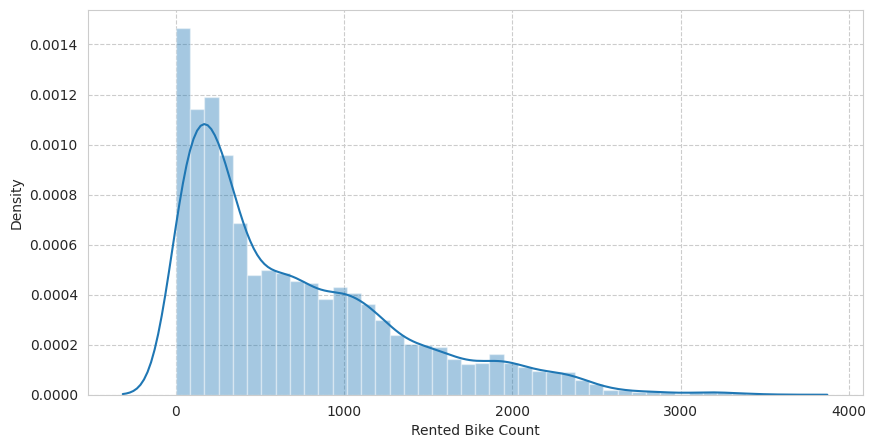

In [104]:
# checking the distribution of our Dependent Variable
plt.figure(figsize=(10,5))
sns.distplot(bike_df['Rented Bike Count'])

In Linear Regression we assume that the distribution of Dependent variable has to be **Normal**. Hence we will apply **Square Root Transformation** on the our Dependent variable

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

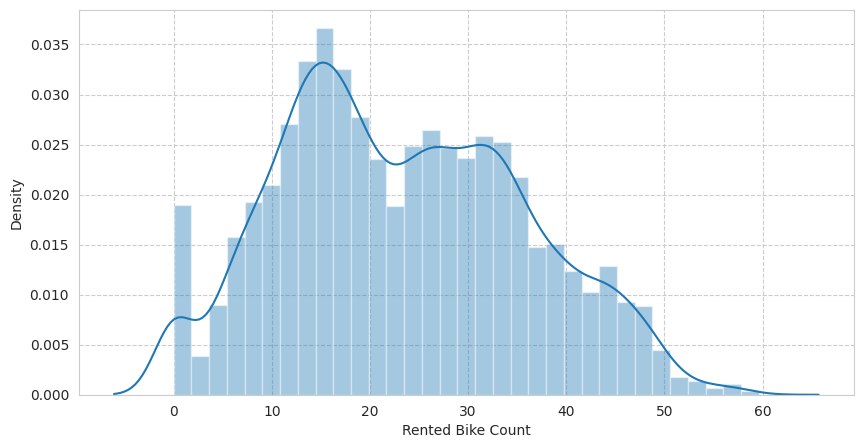

In [105]:
#square root transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']))

### Analysing the **Numerical features** of our dataset

In [106]:
# Extracting the numerical features of dataset
num_features = bike_df.describe().columns
num_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekday_weekend'],
      dtype='object')

In [107]:
# Creating a function to plot features distribution
def feat_dist(feature):
  sns.distplot(bike_df[feature])
  plt.axvline(bike_df[feature].mean(),linestyle='dashed',color='g')
  plt.axvline(bike_df[feature].median(),linestyle='dashed', color='r')
  plt.show()

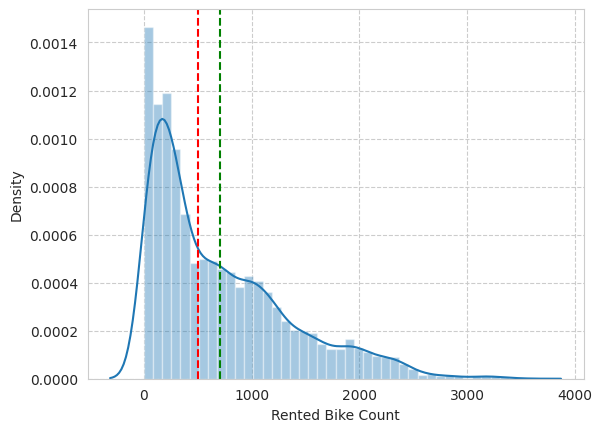

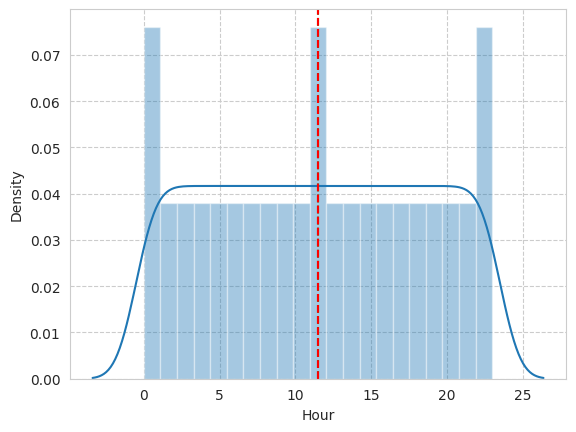

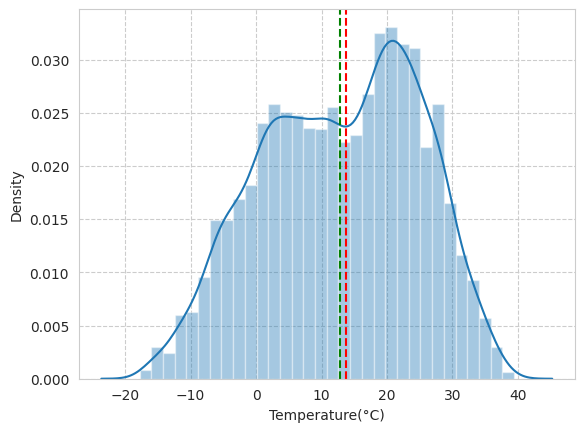

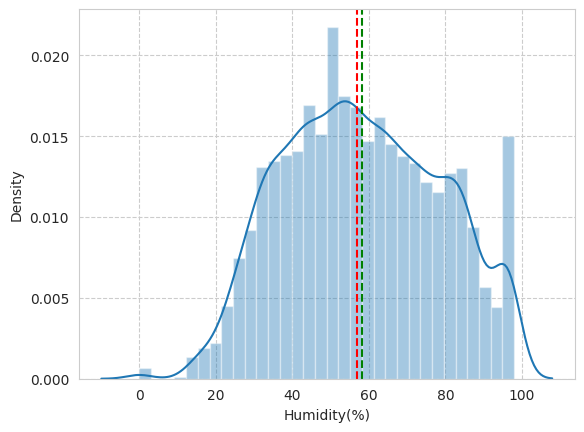

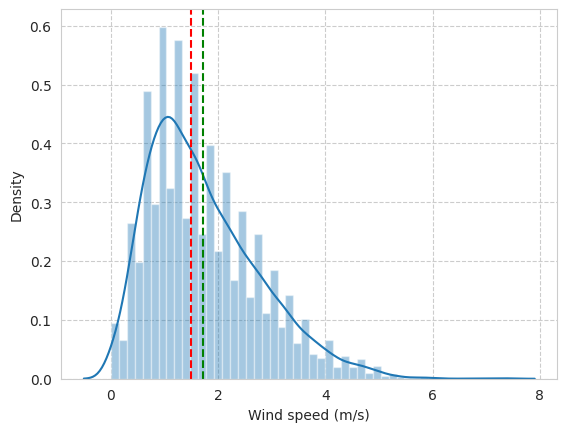

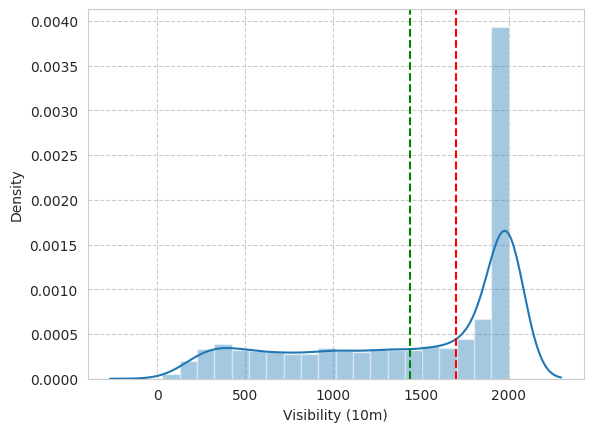

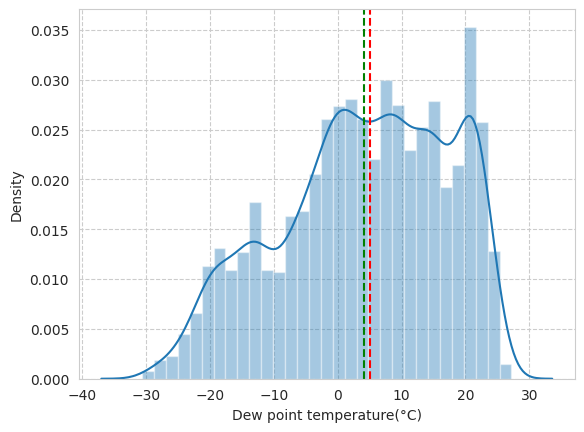

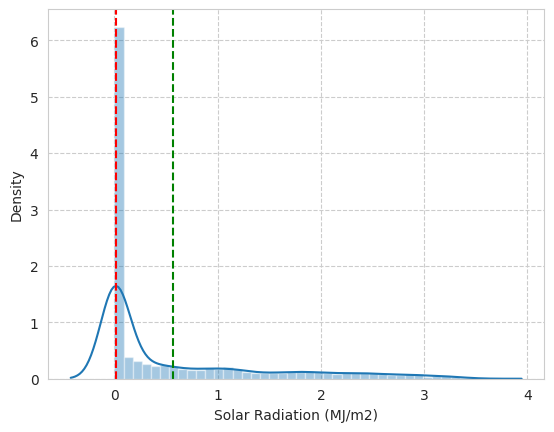

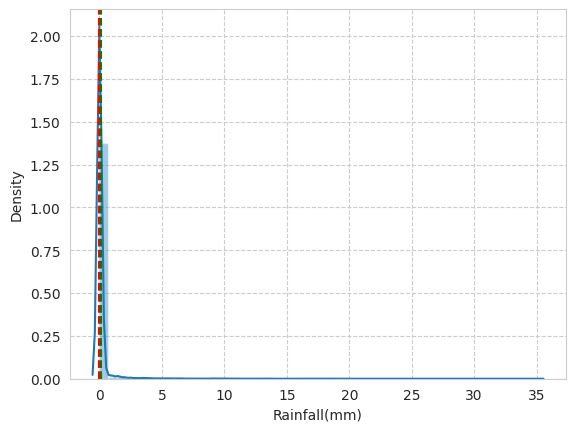

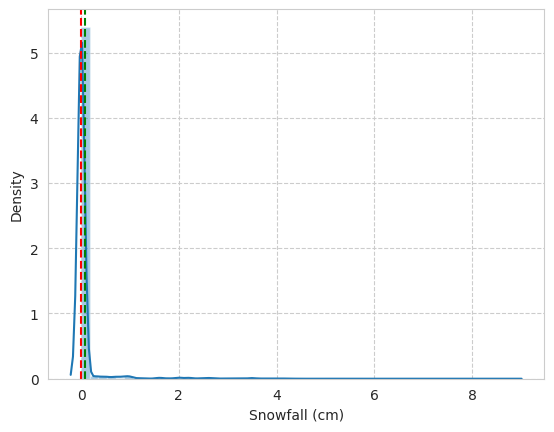

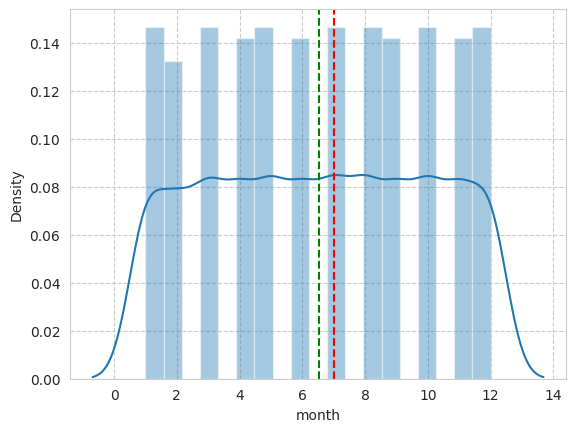

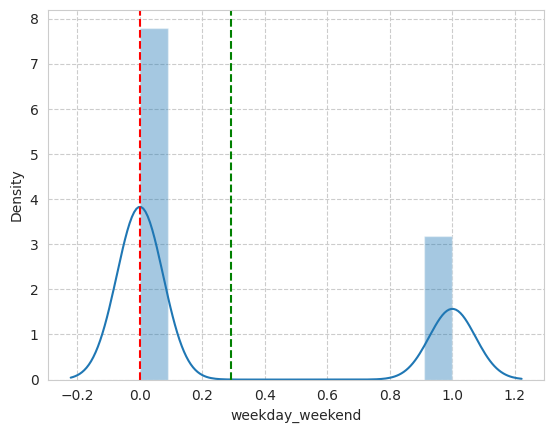

In [108]:
# Plotting distribution plot for each numerical feature along with mean & median
for feature in num_features:
   feat_dist(feature)

Lets check the relation of each numerical feature with Depedent variable (Rented Bike Count) by drawing **Regression plots** for each of them

In [109]:
def reg_plot(feature):
  sns.regplot(x=bike_df[feature],y=bike_df['Rented Bike Count'],line_kws={'color':'red'})
  plt.show()

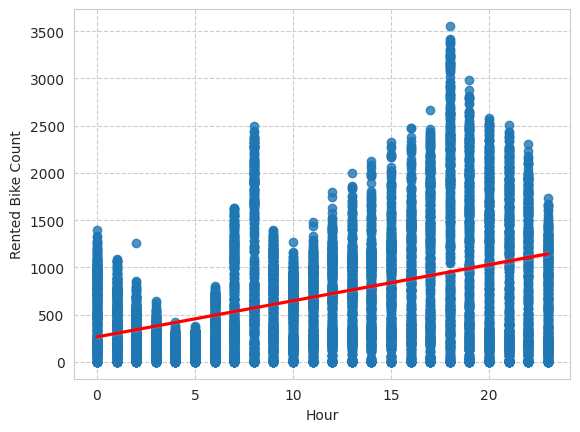

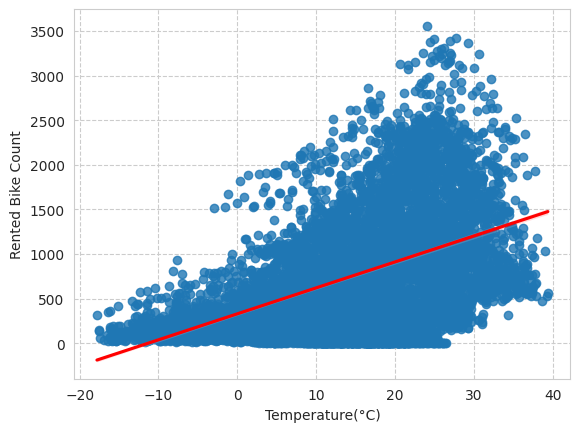

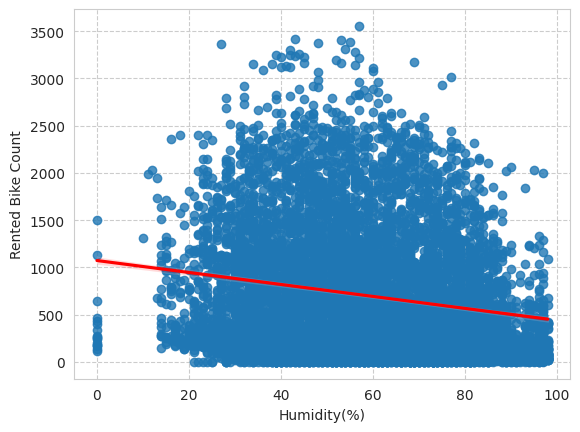

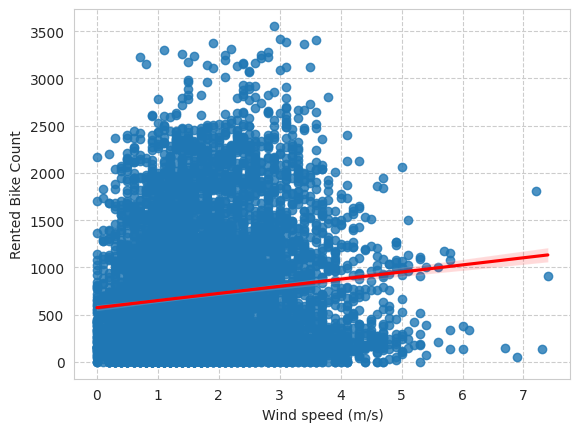

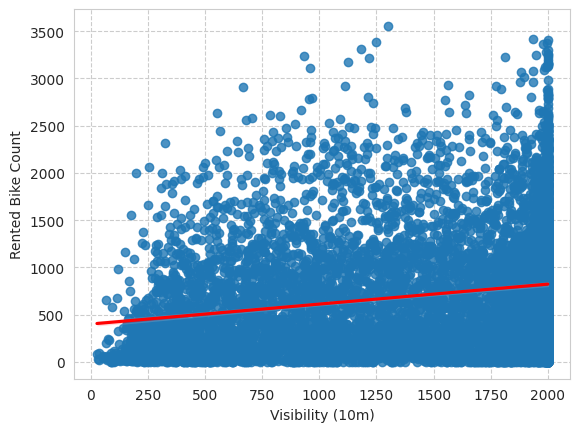

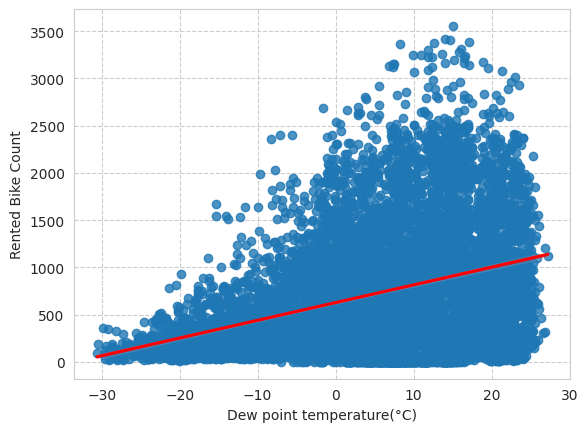

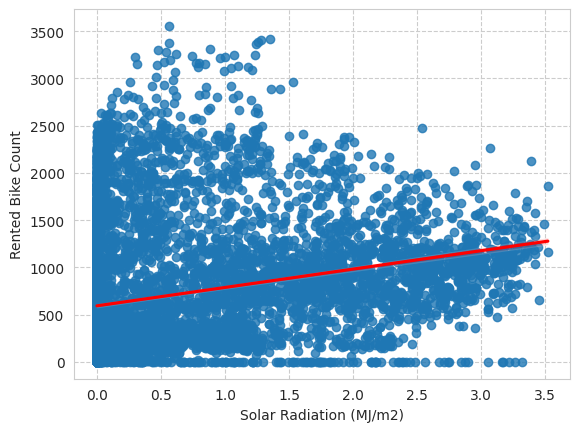

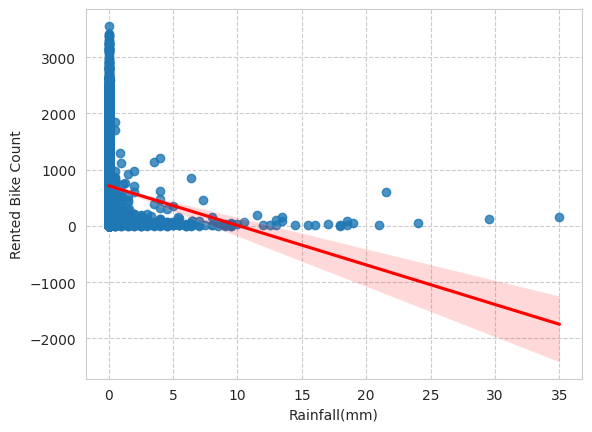

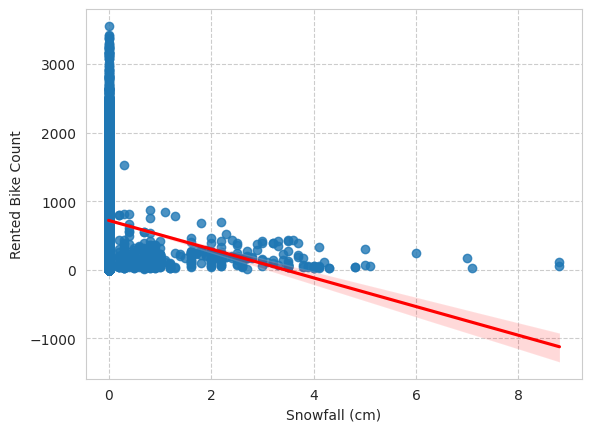

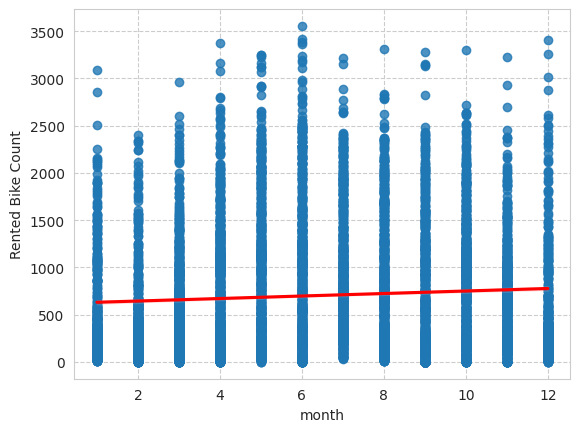

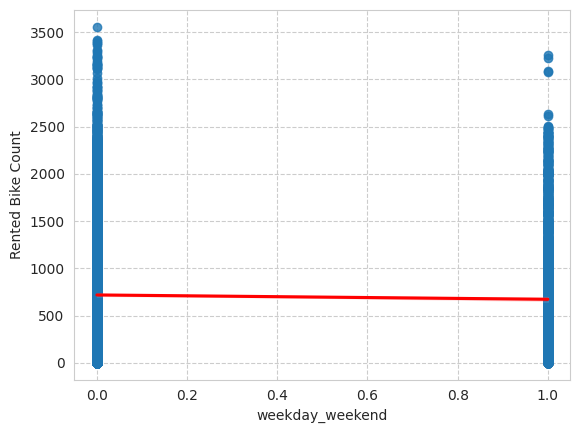

In [110]:
# Visualizing the Regresion plots of each feature with dependent variable
for feature in num_features:
  if feature!='Rented Bike Count':
    reg_plot(feature)

### Analysing the **Categorical features** of our dataset

In [111]:
# Extracting the Categorical features of our Dataset
cat_features = bike_df.select_dtypes(include='object')
cat_features.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


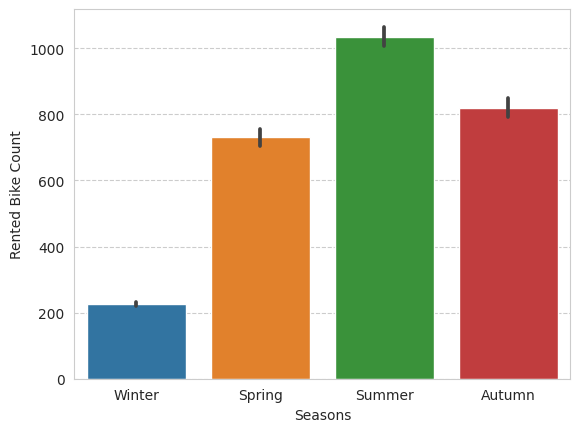

<Figure size 1000x800 with 0 Axes>

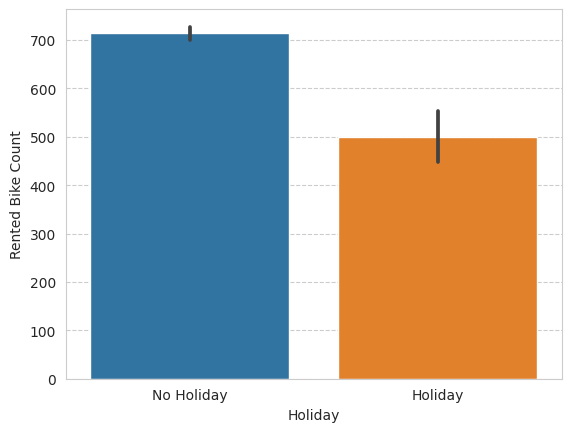

<Figure size 1000x800 with 0 Axes>

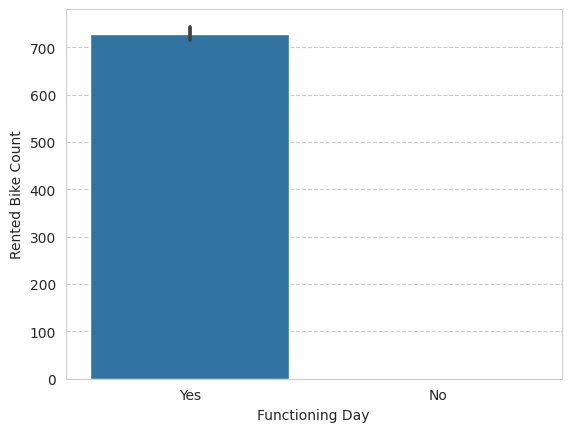

<Figure size 1000x800 with 0 Axes>

In [112]:
# plotting box plot for cateogorical features with dependent variable
for feature in cat_features:
  sns.barplot(x=bike_df[feature],y=bike_df['Rented Bike Count'])
  plt.figure(figsize=(10,8))
  plt.show()


From the above plots we can see that

1. There is high demand in Summers and less demand in winters
2. There is slightly higher demand on No Holidays
3. There is almost no demand on Non Functioning days

Lets check if there is any count on Non functioning days or not

In [113]:
# Checking count for Fuctioning days
bike_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

As expected comparetively there is very less demand Non Functioning Days

<Axes: xlabel='month', ylabel='Rented Bike Count'>

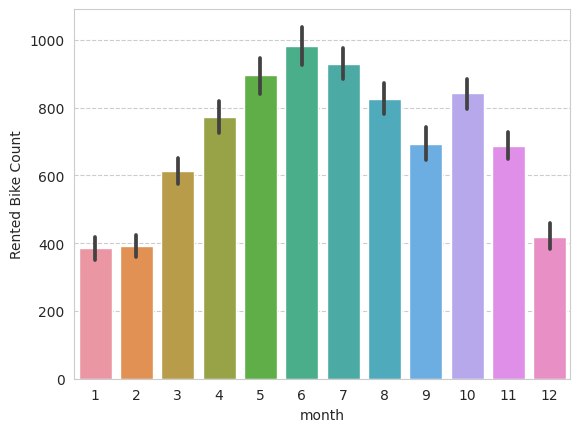

In [114]:
# Checking Rented bike count relation with the Month of year
sns.barplot(x=bike_df['month'],y=bike_df['Rented Bike Count'])

From the above graph we can see that
1. May, June, July Months have the most rented bikes count
2. Whereas January and February have relatively lesser Rented bikes count

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

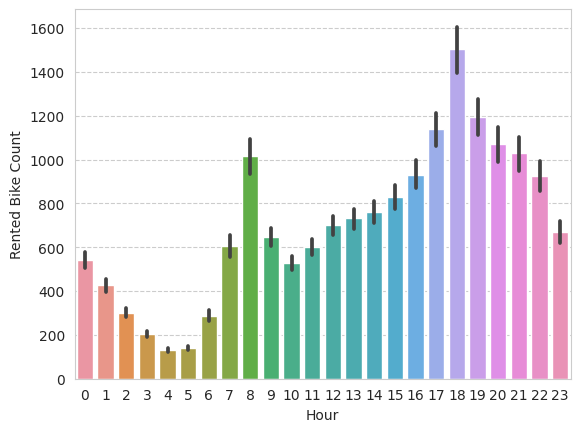

In [115]:
# Checking Rented bikes count at each hour
sns.barplot(x=bike_df['Hour'],y=bike_df['Rented Bike Count'])

<Axes: title={'center': 'Average of Bikes Rented per hour'}, xlabel='Hour'>

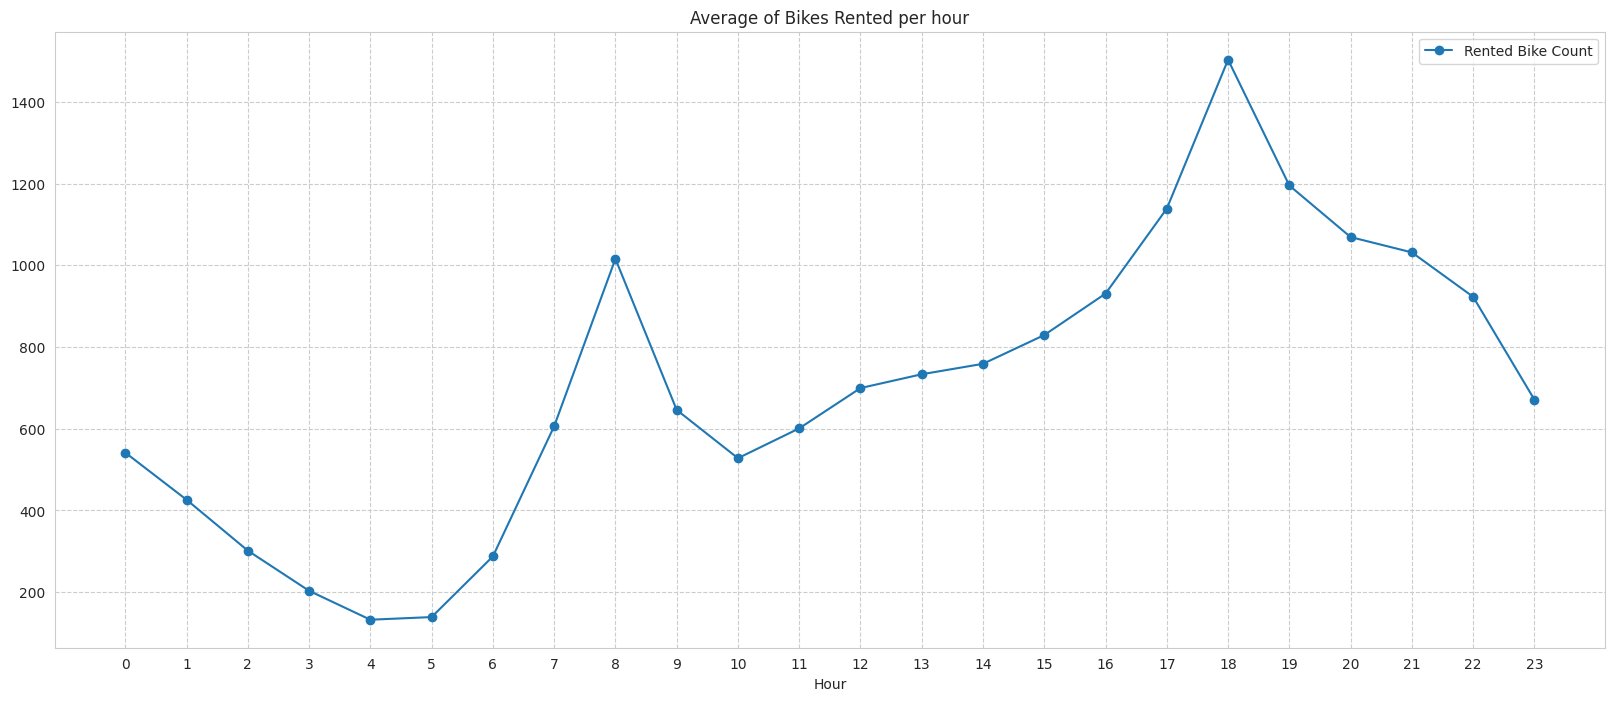

In [116]:
# Grouping the rented bikes count by hour & getting the average of each hour
avg_rents_hrs = bike_df.groupby('Hour')['Rented Bike Count'].mean()

# Plotting a line graph of avg rents over time (Hrs)
plt.figure(figsize=(20,8))
avg_rents_hrs.plot(legend=True,marker='o',title='Average of Bikes Rented per hour',xticks=range(len(avg_rents_hrs)))

We can see from the above graph that

1. There is high demand for bikes at 8AM and 6PM
2. This demand for rented bikes might be due to use of bikes for office transit.

### Checking for **Multicollinearity**

<Axes: >

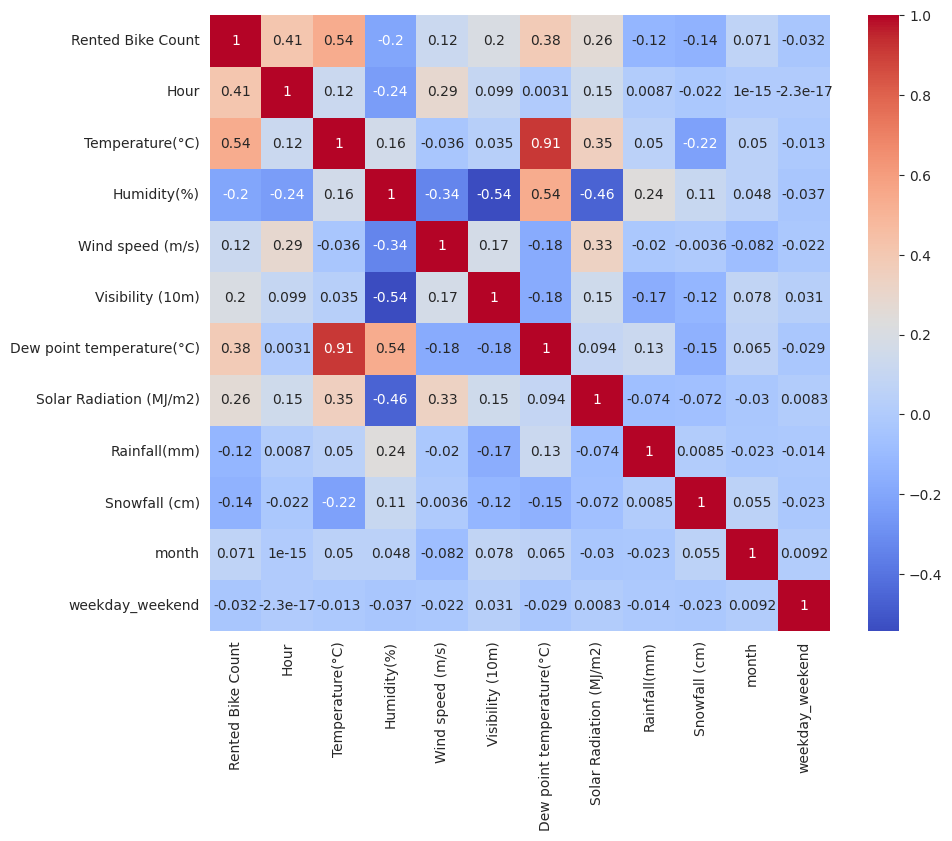

In [117]:
# plotting a correlation map
plt.figure(figsize=(10,8))
sns.heatmap(bike_df.corr(), annot=True, cmap='coolwarm')

From the above heatmap we can observe that

1. **Multicollinearity** is present between two features namely **Temperature** and **Dew Point Temperature**

2. Hence we can drop the feature **Dew Point Temperature (C)** as it is less correlated to Dependent variable-Rented Bike Count (Corr=0.38) when compared to feature **Temperature (C)** correlation (Corr=0.54)

In [118]:
# droping "Dew Point Temperature" Feature as it is Multicorrelated with "Temperature" Feature
bike_df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


## **Feature Engineering**

In this step, We will be performing the below

1. Applying log to '**Rented Bike Count**' as it is **positivley skewed** and to perform Linear Regression the **Dependent Variable** must be **normaly distributed**

2. Removing **Outliers**

3. **One Hot Coding** to Categorical features

4. **MinMax Scaling** the features

In [119]:
# Creating a function to replace 1 with 0 in Dependent Variable, as we will be applying log to the Dependent variable
def log_dv(x):
  if x==0:
    return 1
  else:
    return x

In [120]:
# Applying the above function to dependent variable
bike_df['Rented Bike Count'] = bike_df['Rented Bike Count'].apply(log_dv)

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

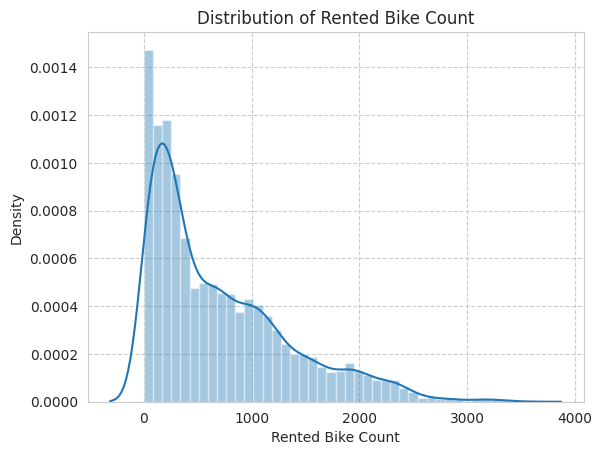

In [121]:
# Dependent variable distribution before log transformation
sns.distplot(bike_df['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

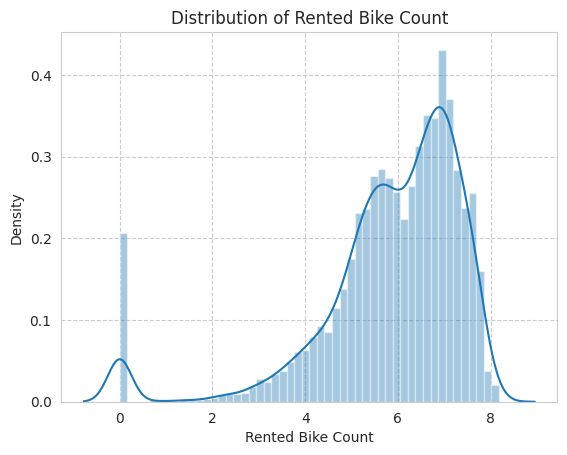

In [122]:
# Applying log to the dependent variable
bike_df['Rented Bike Count']=np.log(bike_df['Rented Bike Count'])

# Dependent variable distribution After log transformation
sns.distplot(bike_df['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')

### **Checking and Removing Outliers**

In [123]:
# checking for outliers
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekday_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,5.882209,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,6.526027,0.290411
std,1.585281,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.252273,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,6.223567,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,6.970965,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,10.000000,1.000000
max,8.176392,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,12.000000,1.000000


In the datset every feature has some outliers, So we have to remove these outliers

In [134]:
bike_df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'month', 'weekday_weekend'],
      dtype='object')

In [145]:
# REMOVING OUTLIERS
# using a for loop to store the indices of outliers
indices=[]                                                                                              # Creating any empty list
for feature in bike_df.describe().columns:
  x=bike_df[feature]
  mean=bike_df[feature].mean()
  std=bike_df[feature].std()
  index=bike_df[ (np.abs(x))- (mean) >= (3*std)].index                                                    # getting the each outlier index
  indices.append(index)

In [153]:
list(indices)

[Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([  85,   87,   89,  249,  253,  375,  611,  615,  933,  937,  974,
             1309, 1409, 1575, 1720, 1721, 1722, 1723, 1724, 1791, 2034, 2169,
             2170, 2174, 2177, 3042, 3053, 3055, 3058, 3063, 3065, 3133, 3134,
             3136, 3137, 3138, 3139, 3140, 3141, 3142, 3181, 3182, 3710, 3712,
             4188, 4190, 4985, 6311, 6316, 6641, 6684, 6686, 6687, 6689, 7429,
             7549, 7550, 7835, 7916, 7932, 7937, 7985, 8245],
            dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([2989, 3157, 3181, 3277, 3325, 3396, 3397, 3398, 3493, 3564, 3565,
             3566, 3589, 3708, 3709, 3710, 3828, 3829, 3853, 3854, 4068, 4069,
             4070, 4116, 4117, 4164, 4165, 4166, 4188, 4189, 4190, 4212, 4213,
             4236, 4237, 4284, 4285, 4286, 4356, 4357, 4380, 4381, 4382, 4404,
             4405, 4406, 4428, 4429, 44

We are having **173 outliers** for one of the features (**Snowfall Feature**). So we will be droping these rows.

In [154]:
# Creating a copy of dataset
new_bike_df=bike_df.copy()

In [155]:
# Removing the outliers from the dataset
new_bike_df.drop(list(indices)[7], inplace=True)
new_bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday_weekend
0,5.537334,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,5.318120,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,5.153292,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,4.672829,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,4.356709,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


### **One Hot Coding** - Categorical Features

In [163]:
cat_features = new_bike_df.select_dtypes(include='object')

In [164]:
# Creating dummy variables for Categorical features
dummy_cat_features=pd.get_dummies(cat_features,drop_first=True)
dummy_cat_features

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [165]:
# concating numeric columns and dummy columns and creating final_df
final_df= pd.concat([dummy_cat_features,new_bike_df],axis=1)
final_df

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday_weekend
0,0,0,1,1,1,5.537334,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,0,0,1,1,1,5.318120,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,0,0,1,1,1,5.153292,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,0,0,1,1,1,4.672829,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,0,0,1,1,1,4.356709,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,1,1,6.910751,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,0,0,0,1,1,6.638568,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,0,0,0,1,1,6.542472,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,0,0,0,1,1,6.568078,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


In [166]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8666.0,0.252366,0.434395,0.0,0.000000,0.000000,1.000000,1.000000
Seasons_Summer,8666.0,0.249827,0.432938,0.0,0.000000,0.000000,0.000000,1.000000
Seasons_Winter,8666.0,0.248558,0.432202,0.0,0.000000,0.000000,0.000000,1.000000
Holiday_No Holiday,8666.0,0.950381,0.217169,0.0,1.000000,1.000000,1.000000,1.000000
Functioning Day_Yes,8666.0,0.966305,0.180453,0.0,1.000000,1.000000,1.000000,1.000000
Rented Bike Count,8666.0,5.908273,1.566490,0.0,5.283204,6.247075,6.976115,8.176392
Hour,8666.0,11.496077,6.929705,0.0,5.000000,11.000000,17.000000,23.000000
Temperature(°C),8666.0,12.831445,11.980748,-17.8,3.300000,13.600000,22.500000,39.400000
Humidity(%),8666.0,57.821602,20.094291,0.0,42.000000,57.000000,73.000000,98.000000
Wind speed (m/s),8666.0,1.726841,1.036873,0.0,0.900000,1.500000,2.300000,7.400000


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [30]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [31]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [32]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [33]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [34]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [35]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [36]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [37]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [38]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [39]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [40]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [41]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [42]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [43]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [44]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [49]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [50]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [51]:
# Expand Contraction

#### 2. Lower Casing

In [52]:
# Lower Casing

#### 3. Removing Punctuations

In [53]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [54]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [55]:
# Remove Stopwords

In [56]:
# Remove White spaces

#### 6. Rephrase Text

In [57]:
# Rephrase Text

#### 7. Tokenization

In [58]:
# Tokenization

#### 8. Text Normalization

In [59]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [60]:
# POS Taging

#### 10. Text Vectorization

In [61]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [62]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [63]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [64]:
# Transform Your data

### 6. Data Scaling

In [65]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [66]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [67]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [68]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [69]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [74]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [77]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [78]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***